Importing Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Customer-Churn-Records.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


## Checking Data

Checking the types of data that we are working with, the shape of the data, and the null values in the columns in case we have to do any data cleaning.

In [4]:
df.info()
df.shape
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

## Identifying Correlations

We want to analyse which metrics correlate most to exited. We can identify this visually by creating a correlation matrix.

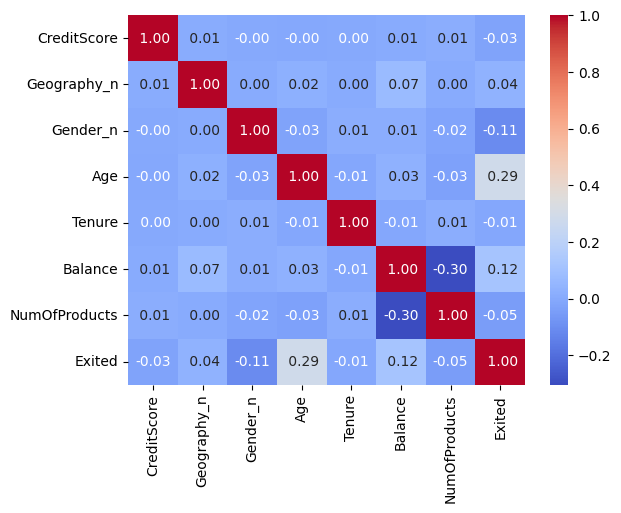

In [11]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Encoding objects

le = LabelEncoder()

object_list = ["Geography", "Gender", "Card Type"]

for object in object_list:
    df[f"{object}_n"] = le.fit_transform(df[object])


correlation_heatmap_1 = sns.heatmap(df[["CreditScore", "Geography_n", "Gender_n", "Age", "Tenure", "Balance", "NumOfProducts", "Exited"]].corr(), annot=True, fmt=" .2f", cmap="coolwarm")

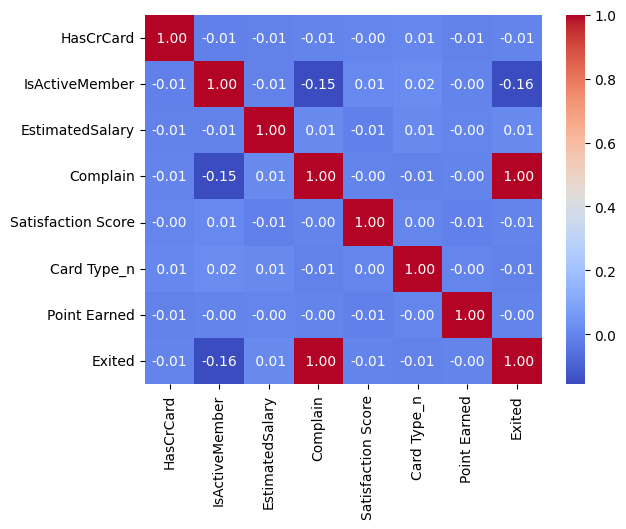

In [12]:
correlation_heatmap_2 = sns.heatmap(df[["HasCrCard", "IsActiveMember", "EstimatedSalary", "Complain", "Satisfaction Score", "Card Type_n", "Point Earned", "Exited"]].corr(), annot=True, fmt=" .2f", cmap="coolwarm")

From the data we can identify that complaint's and exited have a 1:1 correlation. Most of the values have a negative correlation or no correlation to whether a customer would exit or not, although these negative values are very small. The categories that have the highest correlation with exited are Age at 0.29, Balance at 0.12 and Geography at 0.14. Next we will look in to what age range, balance amount and locations have the highest exited amount.